<a href="https://colab.research.google.com/github/lishavin/Amazon/blob/main/GloVe%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Required Packages

- ÌååÏùº > DriveÏóê ÏÇ¨Î≥∏ Ï†ÄÏû•
- ÏïÑÎûò Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò ÌõÑ session restart ÌïÑÏöî (Îü∞ÌÉÄÏûÑ > ÏÑ∏ÏÖòÎã§ÏãúÏãúÏûë)
- drive mount (pretrained weight)

In [1]:
!pip install datasets
!pip install numpy==1.26
!pip install scipy==1.13.1
!pip install gensim
!pip install fsspec==2023.4.0 #"**" Í≤ΩÎ°ú Ìå®ÌÑ¥ Ìò∏ÌôòÎêòÎäî fsspec ÏòõÎÇ†Î≤ÑÏ†ÑÏúºÎ°ú Îã§Ïö¥Í∑∏Î†àÏù¥Îìú

!pip install nltk

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.5/58.5 kB 561.7 kB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.2/18.2 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import nltk #ÌÜ†ÌÅ∞Ìôî, Î∂àÏö©Ïñ¥ Ï†úÍ±∞, ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú Îì±ÏùÑ ÏúÑÌïú ÏûêÏõê Îã§Ïö¥Î°úÎìú
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## 1. Load Data

In [3]:
from datasets import load_dataset
df = load_dataset("fancyzhx/amazon_polarity")

# trainÍ≥º testÎ•º Í∞ÅÍ∞Å pandas DataFrameÏúºÎ°ú Î≥ÄÌôò
train_df = df["train"].select(range(10000)).to_pandas()
test_df = df["test"].select(range(5000)).to_pandas()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/400000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/3600000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [4]:
type(train_df)
type(test_df)

pandas.core.frame.DataFrame

## 2. EDA


- 1 : positive
- 0 : negative

In [5]:
train_df.head()

label                                              title  \
0      1                     Stuning even for the non-gamer   
1      1              The best soundtrack ever to anything.   
2      1                                           Amazing!   
3      1                               Excellent Soundtrack   
4      1  Remember, Pull Your Jaw Off The Floor After He...   

                                             content  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...

In [6]:
#data type ÌôïÏù∏
print("Train Dataset DataType")
print(train_df.dtypes)

print("\nTest Dataset DataType")
print(test_df.dtypes)

Train Dataset DataType
label       int64
title      object
content    object
dtype: object

Test Dataset DataType
label       int64
title      object
content    object
dtype: object


In [7]:
train_df.isnull()

label  title  content
0     False  False    False
1     False  False    False
2     False  False    False
3     False  False    False
4     False  False    False
...     ...    ...      ...
9995  False  False    False
9996  False  False    False
9997  False  False    False
9998  False  False    False
9999  False  False    False

[10000 rows x 3 columns]

In [8]:
#Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("Train Dataset Í≤∞Ï∏°Ïπò")
print(train_df.isnull().sum())

print("\nTest Dataset Í≤∞Ï∏°Ïπò")
print(test_df.isnull().sum())

Train Dataset Í≤∞Ï∏°Ïπò
label      0
title      0
content    0
dtype: int64

Test Dataset Í≤∞Ï∏°Ïπò
label      0
title      0
content    0
dtype: int64


label
0    5097
1    4903
Name: count, dtype: int64


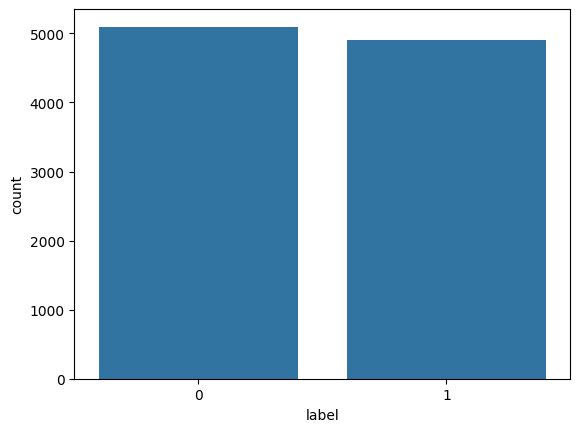

In [9]:
#label ÎπÑÏú® ÌôïÏù∏
import seaborn as sns
sns.countplot(x='label', data= train_df)
print(train_df.label.value_counts())

label
1    2565
0    2435
Name: count, dtype: int64


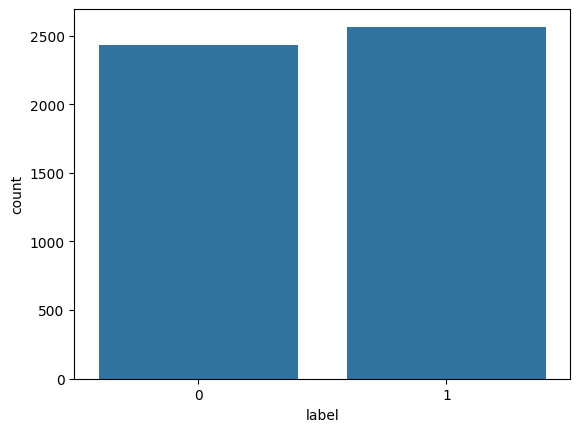

In [10]:
#label ÎπÑÏú® ÌôïÏù∏
sns.countplot(x='label', data= test_df)
print(test_df.label.value_counts())

In [11]:
train_df

label                                              title  \
0         1                     Stuning even for the non-gamer   
1         1              The best soundtrack ever to anything.   
2         1                                           Amazing!   
3         1                               Excellent Soundtrack   
4         1  Remember, Pull Your Jaw Off The Floor After He...   
...     ...                                                ...   
9995      1  A revelation of life in small town America in ...   
9996      1   Great biography of a very interesting journalist   
9997      0             Interesting Subject; Poor Presentation   
9998      0                                          Don't buy   
9999      1                   Beautiful Pen and Fast Delivery.   

                                                content  
0     This sound track was beautiful! It paints the ...  
1     I'm reading a lot of reviews saying that this ...  
2     This soundtrack is my favorite music of all ti...  
3     I truly like this soundtrack and I enjoy video...  
4     If you've played the game, you know how divine...  
...                                                 ...  
9995  Though a scholarly biography, the book reveals...  
9996  This biography of Arthur Aull, a small-town jo...  
9997  You'd be hard-pressed to tell a boring story a...  
9998  The box looked used and it is obviously not ne...  
9999  The pen was shipped promptly. This is the clas...  

[10000 rows x 3 columns]

## 3. Text Cleaning



>1. Ï†ïÍ∑úÌëúÌòÑÏãù
  - HTML ÌÉúÍ∑∏ Ï†úÍ±∞
  - ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
2. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
3. Stopwords Ï†úÍ±∞
4. Stemming (Ïñ¥Í∞Ñ Ï∂îÏ∂ú) /Lemmatization (ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú)



##### Amazon Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©

In [12]:
# titleÍ≥º content Ïó¥ Ìï©ÏπòÍ∏∞
train_df["review"] = train_df["title"] + " " + train_df["content"]
test_df["review"] = test_df["title"] + " " + test_df["content"]

In [13]:
import re #Ï†ïÍ∑úÌëúÌòÑÏãù regular expression: HTML ÌÉúÍ∑∏ÎÇò ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞Ïãú ÏÇ¨Ïö©
import nltk
from nltk.corpus import stopwords #nltkÏóêÏÑú Ï†úÍ≥µÌïòÎäî Î∂àÏö©Ïñ¥(stopwords) Î¶¨Ïä§Ìä∏Î•º Î∂àÎü¨Ïò§Í∏∞ ÏúÑÌïú Í≤É
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer #Ïñ¥Í∞Ñ Ï∂îÏ∂ú, ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú

# Ï≤òÏùå Ìïú Î≤àÏùÄ Îã§Ïö¥Î°úÎìú ÌïÑÏöî
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_review(review):
    # HTML ÌÉúÍ∑∏ Ï†úÍ±∞
    review = re.sub('<[^>]*>', '', review)
    # ÌäπÏàò Î¨∏Ïûê Ï†úÍ±∞ (!Îäî ÎÇ®Í∏∞Í∏∞)
    review = re.sub('[^a-zA-Z0-9 ?]', '', review)
    # ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    review = review.lower()
    # ÌÜ†ÌÅ∞Ìôî
    tokens = word_tokenize(review)
    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
train_df['processed_review'] = train_df['review'].apply(preprocess_review)
test_df['processed_review'] = test_df['review'].apply(preprocess_review)

In [15]:
train_df.head()

label                                              title  \
0      1                     Stuning even for the non-gamer   
1      1              The best soundtrack ever to anything.   
2      1                                           Amazing!   
3      1                               Excellent Soundtrack   
4      1  Remember, Pull Your Jaw Off The Floor After He...   

                                             content  \
0  This sound track was beautiful! It paints the ...   
1  I'm reading a lot of reviews saying that this ...   
2  This soundtrack is my favorite music of all ti...   
3  I truly like this soundtrack and I enjoy video...   
4  If you've played the game, you know how divine...   

                                              review  \
0  Stuning even for the non-gamer This sound trac...   
1  The best soundtrack ever to anything. I'm read...   
2  Amazing! This soundtrack is my favorite music ...   
3  Excellent Soundtrack I truly like this soundtr...   
4  Remember, Pull Your Jaw Off The Floor After He...   

                                    processed_review  
0  stuning even nongamer sound track beautiful pa...  
1  best soundtrack ever anything im reading lot r...  
2  amazing soundtrack favorite music time hand in...  
3  excellent soundtrack truly like soundtrack enj...  
4  remember pull jaw floor hearing youve played g...

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('processed_review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('content')):
  _plot_series(series, series_name, i)
  fig.legend(title='content', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('review')):
  _plot_series(series, series_name, i)
  fig.legend(title='review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('processed_review')):
  _plot_series(series, series_name, i)
  fig.legend(title='processed_review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['content'].value_counts()
    for x_label, grp in _df_8.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('content')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['review'].value_counts()
    for x_label, grp in _df_9.groupby('content')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('content')
_ = plt.ylabel('review')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['processed_review'].value_counts()
    for x_label, grp in _df_10.groupby('review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('review')
_ = plt.ylabel('processed_review')

## 4. Train-Valid Split

In [19]:
from sklearn.model_selection import train_test_split

# 80% train, 20% validation
data_train, data_valid = train_test_split(
    train_df,                  # ÏõêÎûò train Îç∞Ïù¥ÌÑ∞ÏÖã
    test_size=0.2,             # 20%Îäî validationÏúºÎ°ú
    stratify=train_df['label'], # label ÎπÑÏú® Ïú†ÏßÄ (Í∏ç/Î∂ÄÏ†ï Í∑†Ìòï)
    random_state=42           # Ïû¨ÌòÑÏÑ± (Í∞ôÏùÄ split Í≤∞Í≥º)
)

data_test = test_df           # ÌÖåÏä§Ìä∏Îäî Ïù¥ÎØ∏ Î≥ÑÎèÑÎ°ú ÏûàÏùå

In [20]:
len(data_train)

8000

In [21]:
len(data_valid)

2000

## 5. Vectorization + Classifier

##### Glove


In [24]:
# GloVe Î≤°ÌÑ∞ Î°úÎî©
def load_glove_model(glove_file_path):
    print("Loading GloVe model...")
    glove_model = {}
    with open(glove_file_path, encoding="utf-8") as f:
        for line in tqdm(f):
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            glove_model[word] = vector
    print(f"{len(glove_model)} words loaded!")
    return glove_model

# Î¨∏Ïû• ‚Üí ÌèâÍ∑† Î≤°ÌÑ∞ Î≥ÄÌôò
def sentence_to_vector(sentence, glove_model, vector_dim=300):
    tokens = sentence.split()
    vecs = [glove_model[word] for word in tokens if word in glove_model]
    if not vecs:
        return np.zeros(vector_dim)
    return np.mean(vecs, axis=0)

In [25]:
# GloVe Î™®Îç∏ Î°úÎìú (StanfordÏóêÏÑú ÏÇ¨Ï†ÑÌïôÏäµÌïú Î™®Îç∏)
glove_path = "/content/drive/MyDrive/weights/glove.6B.300d.txt"  # ÏúÑÏπò ÎßûÍ≤å ÏßÄÏ†ï
glove_model = load_glove_model(glove_path)

Loading GloVe model...


400000it [00:39, 10041.54it/s]

400000 words loaded!


In [26]:
glove_model['king']

array([ 0.0033901, -0.34614  ,  0.28144  ,  0.48382  ,  0.59469  ,
        0.012965 ,  0.53982  ,  0.48233  ,  0.21463  , -1.0249   ,
       -0.34788  , -0.79001  , -0.15084  ,  0.61374  ,  0.042811 ,
        0.19323  ,  0.25462  ,  0.32528  ,  0.05698  ,  0.063253 ,
       -0.49439  ,  0.47337  , -0.16761  ,  0.045594 ,  0.30451  ,
       -0.35416  , -0.34583  , -0.20118  ,  0.25511  ,  0.091111 ,
        0.014651 , -0.017541 , -0.23854  ,  0.48215  , -0.9145   ,
       -0.36235  ,  0.34736  ,  0.028639 , -0.027065 , -0.036481 ,
       -0.067391 , -0.23452  , -0.13772  ,  0.33951  ,  0.13415  ,
       -0.1342   ,  0.47856  , -0.1842   ,  0.10705  , -0.45834  ,
       -0.36085  , -0.22595  ,  0.32881  , -0.13643  ,  0.23128  ,
        0.34269  ,  0.42344  ,  0.47057  ,  0.479    ,  0.074639 ,
        0.3344   ,  0.10714  , -0.13289  ,  0.58734  ,  0.38616  ,
       -0.52238  , -0.22028  , -0.072322 ,  0.32269  ,  0.44226  ,
       -0.037382 ,  0.18324  ,  0.058082 ,  0.26938  ,  0.3620

In [28]:
# Í∞Å Î¶¨Î∑∞Î•º Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
tqdm.pandas()
X_train_vec = data_train['processed_review'].progress_apply(lambda x: sentence_to_vector(x, glove_model, 300))
X_valid_vec = data_valid['processed_review'].progress_apply(lambda x: sentence_to_vector(x, glove_model, 300))
X_test_vec = data_test['processed_review'].progress_apply(lambda x: sentence_to_vector(x, glove_model, 300))

# numpy arrayÎ°ú Î≥ÄÌôò
X_train_vec = np.stack(X_train_vec.values)
X_valid_vec = np.stack(X_valid_vec.values)
X_test_vec = np.stack(X_test_vec.values)

y_train = data_train['label'].values
y_valid = data_valid['label'].values
y_test = data_test['label'].values

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:01<00:00, 3453.87it/s]


In [29]:
print(X_train_vec.shape)
print(X_train_vec[0][:50])

(8000, 300)
[-1.27254754e-01  1.19270004e-01 -1.14059053e-01 -1.27079532e-01
 -3.49795856e-02  5.25418669e-02  1.37897022e-02 -1.64383486e-01
 -5.25028780e-02 -1.16073883e+00  1.07283026e-01  4.44859415e-02
 -1.82927512e-02  2.03364074e-01  1.40852528e-03  1.47705320e-02
 -5.78463562e-02 -1.90051615e-01 -7.02405907e-03 -7.20627084e-02
 -1.19397819e-01  1.51203215e-01 -1.49843276e-01  5.19233681e-02
  1.04579121e-01  2.46765651e-03  1.73340335e-01 -1.61387436e-02
  1.63803533e-01  1.83434095e-02  5.80011196e-02  8.55466798e-02
 -9.93987769e-02 -6.31178118e-05 -8.93291831e-01  1.61556348e-01
 -1.36945531e-01 -6.26666546e-02  1.13561526e-01 -1.22062666e-02
  2.12139949e-01 -1.44219875e-01  3.76897678e-02 -8.12557191e-02
  2.18153987e-02  1.07065894e-01  1.02590285e-01  2.34216750e-01
  2.43194737e-02 -2.34166861e-01]


##### Linear SVM

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM Î™®Îç∏ Ï†ïÏùò
svm_clf = SVC(kernel='linear')

# Î™®Îç∏ ÌïôÏäµ
svm_clf.fit(X_train_vec, y_train)

# ÏòàÏ∏°
svm_valid_preds = svm_clf.predict(X_valid_vec)
svm_test_preds = svm_clf.predict(X_test_vec)

# ÏÑ±Îä• ÌèâÍ∞Ä
print("Validation Accuracy:", accuracy_score(y_valid, svm_valid_preds))
print("Test Accuracy:", accuracy_score(y_test, svm_test_preds))
print("\n[Classification Report on Test Set]\n", classification_report(y_test, svm_test_preds))

Validation Accuracy: 0.816
Test Accuracy: 0.8042

[Classification Report on Test Set]
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      2435
           1       0.81      0.80      0.81      2565

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



# Cross Validation 1
K-fold ÏÑ†ÌÉù: ÌäúÎãù Ï†Ñ baseline ÏÑ±Îä•ÏùÑ ÌôïÏù∏


In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_index, valid_index) in enumerate(kf.split(X_train_vec)):
    X_tr, X_val = X_train_vec[train_index], X_train_vec[valid_index]
    y_tr, y_val = y_train[train_index], y_train[valid_index]

    svm_clf = SVC(kernel='linear')
    svm_clf.fit(X_tr, y_tr)

    val_preds = svm_clf.predict(X_val)
    acc = accuracy_score(y_val, val_preds)
    fold_accuracies.append(acc)

    print(f"[Fold {fold+1}] Validation Accuracy: {acc:.4f}")

print(f"\nüìä Average Validation Accuracy (Baseline - KFold 5): {np.mean(fold_accuracies):.4f}")

[Fold 1] Validation Accuracy: 0.8250
[Fold 2] Validation Accuracy: 0.8269
[Fold 3] Validation Accuracy: 0.8081
[Fold 4] Validation Accuracy: 0.8269
[Fold 5] Validation Accuracy: 0.8087

üìä Average Validation Accuracy (Baseline - KFold 5): 0.8191


# Hyperparameter Tuning

Ïù¥ÎØ∏ Î™®Îç∏ ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏÑú Ï†ïÎ∞ÄÌïú Ï†ÑÏàòÏ°∞ÏÇ¨(Grid)Î≥¥Îã§Îäî 	Îπ†Î•¥Í≤å Í∑ºÏÇ¨ ÏµúÏ†ÅÍ∞íÏùÑ Ï∞æÎäî Í≤å Îçî Ï§ëÏöîÌï¥ÏÑú Random SearchÎ°ú ÏµúÏ†Å C, penalty Í∞í Ï∞æÍ∏∞


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# ÌÉêÏÉâÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ Ï†ïÏùò
param_dist = {
    'C': uniform(loc=0.01, scale=10),  # Ï†ïÍ∑úÌôî ÌååÎùºÎØ∏ÌÑ∞
    'kernel': ['linear'],              # ÏÑ†Ìòï SVM Í≥†Ï†ï
}

# RandomizedSearch Ï†ïÏùò
random_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# ÌïôÏäµ
random_search.fit(X_train_vec, y_train)

# ÏµúÏ†Å Í≤∞Í≥º Ï∂úÎ†•
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# ÏµúÏ†Å Î™®Îç∏ Ï∂îÏ∂ú
best_svm = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.5908361216819946, 'kernel': 'linear'}
Best CV Accuracy: 0.8206249999999999


# Cross Validation 2
ÌäúÎãù ÌõÑ ÏµúÏ¢Ö Î™®Îç∏ÏùÑ Ïû¨Í≤ÄÏ¶ù: RandomizedSearch Í≤∞Í≥ºÍ∞Ä ÏñºÎßàÎÇò Í∞úÏÑ†ÎêêÎäîÏßÄ ÎπÑÍµê

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
tuned_fold_accuracies = []

for fold, (train_index, valid_index) in enumerate(kf.split(X_train_vec)):
    X_tr, X_val = X_train_vec[train_index], X_train_vec[valid_index]
    y_tr, y_val = y_train[train_index], y_train[valid_index]

    best_svm.fit(X_tr, y_tr)
    val_preds = best_svm.predict(X_val)
    acc = accuracy_score(y_val, val_preds)
    tuned_fold_accuracies.append(acc)

    print(f"[Fold {fold+1}] Validation Accuracy (Tuned): {acc:.4f}")

print(f"\n‚úÖ Average Validation Accuracy (Tuned - KFold 5): {np.mean(tuned_fold_accuracies):.4f}")

[Fold 1] Validation Accuracy (Tuned): 0.8237
[Fold 2] Validation Accuracy (Tuned): 0.8256
[Fold 3] Validation Accuracy (Tuned): 0.8100
[Fold 4] Validation Accuracy (Tuned): 0.8206
[Fold 5] Validation Accuracy (Tuned): 0.8113

‚úÖ Average Validation Accuracy (Tuned - KFold 5): 0.8183
